## ==========  PERCEPTRON CLASSIFICATION: DATA SET 1  ==============

### Reading Input Dataset: 2D Attribytes & Class Labels

In [10]:
import csv
import os

In [11]:
x1_attributes = []
x2_attributes = []
labels = []
__location__ = os.path.realpath(os.path.join(os.getcwd(), "logisticX.csv"))
print ("fetching data from location: " + __location__ + " . . .")
with open(__location__, 'r') as csvfile:   # Open the CSV file in read mode # Create a reader object
  csv_reader = csv.reader(csvfile)
  for row in csv_reader:  # Iterate through the rows in the CSV file
    x1_attributes.append(float(row[0]))     # row is a list containing two element
    x2_attributes.append(float(row[1]))     # row is a list containing two element

__location__ = os.path.realpath(os.path.join(os.getcwd(), "logisticY.csv"))
print ("fetching data from location: " + __location__ + " . . .")
with open(__location__, 'r') as csvfile:   # Open the CSV file in read mode # Create a reader object
  csv_reader = csv.reader(csvfile)
  for row in csv_reader:  # Iterate through the rows in the CSV file
      labels.append(float(row[0]))     # row is a list containing single element

print ("number of data points: " + str(len(x1_attributes)))
if len(x1_attributes) != len(labels) or len(x2_attributes) != len(labels):
    print ("ERROR! Input number of attributed does not match the number of class labels!")
    exit(0)

fetching data from location: /Users/dishantgoyal/Desktop/ml/0_neural_network_classification/logisticX.csv . . .
fetching data from location: /Users/dishantgoyal/Desktop/ml/0_neural_network_classification/logisticY.csv . . .
number of data points: 100


### Plotting Dataset

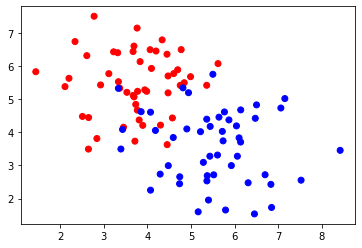

In [12]:
from matplotlib import pyplot as plt
color = []
for y in labels:
    if y == 0:
        color.append('red')
    else:
        color.append('blue')
plt.scatter(x1_attributes, x2_attributes, c=color)
plt.show()

### Plot Initial Hypthesis

##### starting point: line joining any two points, form: y = ax = b

initial slope: 0.5936043629152201, initial intercept: 1.9004886217154207
passes through: (3.8915, 4.2105)  (3.6898, 6.6051)


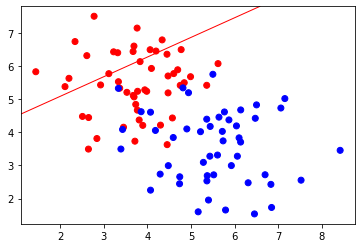

In [55]:
slope     = -0.05*(x2_attributes[1] - x2_attributes[0])/(x1_attributes[1] - x1_attributes[0])
intercept =  x2_attributes[0] - x1_attributes[0]*slope
print("initial slope: " + str(slope) + ", initial intercept: " + str(intercept))
display_pt1 = "(" + str(x1_attributes[0]) + ", " + str(x2_attributes[0]) + ")"
display_pt2 = "(" + str(x1_attributes[1]) + ", " + str(x2_attributes[1]) + ")"
print("passes through: " + display_pt1 + "  " + display_pt2)
plt.scatter(x1_attributes, x2_attributes, c=color)
intercept = intercept + 2
plt.axline((3, 3*slope + intercept), slope=slope, linewidth=1, color='r')# or plt.plot([acidity[0],acidity[1]], [density[0],density[1]])
plt.show()


### Error Function: Least Squares

In [56]:
import math
e = math.e
def comp_error(a, b, error):
    for index in range(0, len(x1_attributes)):    # compute the full error
        x1              = x1_attributes[index]
        x2              = x2_attributes[index]
        scaled_distance = (x2 - a*x1 - b)*10                   # z = Theta_Transpose.x
        gz              = 1/(1+pow(e, scaled_distance))      # lies between 0 and 1 
        probability     = gz                                   # probability of being in class 1        
        if labels[index] == 0:  
            pt_error  = (1-(1-probability))*(1-(1-probability))   # = probability*probability
        else:                   
            pt_error  = (1-probability)*(1-probability)
        
        error[0] += pt_error
        
        
        
    # error[0] = -1*error[0]                                     # - log likelyhood to make the error value positive

error = [0]
comp_error(slope, intercept, error)
print ("Initial Error: " + str(error[0]))

Initial Error: 33.9514310917449


### Gradient Computation

In [57]:
def comp_grad(a, b, grad_val):
    if num_iter % 1000 == 0:
        print ("computing gradient with all data points")
    for index in range(0, len(x1_attributes)):
        x1              = x1_attributes[index]
        x2              = x2_attributes[index]
        scaled_distance = (x2 - a*x1 - b)*10                      # z = Theta_Transpose.x
        gz              = 1/(1+pow(e,-1*scaled_distance))      # lies between 0 and 1 
        probability     = gz                                   # probability of being in class 1
        
        if labels[index] == 0:                  # 2(y - gz).gz.(1-gz).(*)
            grad_val[0] += -2 * probability * -1 * gz * (1-gz) * x1           
            grad_val[1] += -2 * probability * -1 * gz * (1-gz) * 1
        else:                                   # gradient of log(gz)   = 1 - gz
            grad_val[0] += 2 * (1-probability) * -1 * gz * (1-gz) * x1
            grad_val[1] += 2 * (1-probability) * -1 * gz * (1-gz) * 1

num_iter = 0
grad_val = [0,0]
comp_grad(slope, intercept, grad_val)
print ("Initial Gradient: " + str(grad_val))

computing gradient with all data points
Initial Gradient: [4.91000987616849, 1.3635375829542673]


### Gradient Descent

In [58]:
learning_rate = 0.001

In [59]:

old_error    = [99999999]
flag = 0
direction = 1
num_iter = 0

while (old_error[0] > 0.00001) and num_iter < 100000:
    error = [0]
    comp_error(slope, intercept, error)
    if (num_iter%10000 == 0):
        print ("error:     " + str(error))
        
    grad_val  = [0,0]
    comp_grad (slope, intercept, grad_val)                              # computing gradient
    slope     = slope     - direction*learning_rate*grad_val[0];        # updating hypothesis
    intercept = intercept - direction*learning_rate*grad_val[1];        # updating hypothesis

    if flag == 0:                       # change direction if the error is not decreased after the first step
        new_error = [0]
        comp_error(slope, intercept, new_error)
        if new_error[0] > error[0]:
            print ("changing the direction of movement! restoring previous hypothesis . . .") 
            slope     += direction*learning_rate*grad_val[0];
            intercept += direction*learning_rate*grad_val[1];
            direction = -1
            continue
        else:
            print ("moving in the right direction... all good!") 
            flag = 1
        

    if error[0] > old_error[0]:
        slope     += direction*learning_rate*grad_val[0];
        intercept += direction*learning_rate*grad_val[1];
        learning_rate = learning_rate/10;
        print ("EXITING... Reached End! Error will increase from now on!")
        print ("error:     " + str(error))
        break
    old_error[0]   =  error[0]
    num_iter +=1;

error:     [33.9514310917449]
computing gradient with all data points
moving in the right direction... all good!
computing gradient with all data points
computing gradient with all data points
computing gradient with all data points
computing gradient with all data points
computing gradient with all data points
computing gradient with all data points
computing gradient with all data points
computing gradient with all data points
computing gradient with all data points
error:     [8.980923725540285]
computing gradient with all data points
computing gradient with all data points
computing gradient with all data points
computing gradient with all data points
computing gradient with all data points
EXITING... Reached End! Error will increase from now on!
error:     [8.789449043288595]


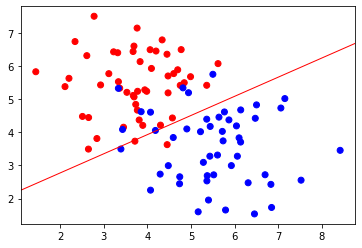

In [60]:
plt.scatter(x1_attributes, x2_attributes, c=color)
plt.axline((3, 3*slope + intercept), slope=slope, linewidth=1, color='r')# or plt.plot([acidity[0],acidity[1]], [density[0],density[1]])
plt.show()